# Analysis of variance (ANOVA)
ANOVA is a hypothesis testing technique tests the equality of *two or more population means* by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means.

## Assumptions of ANOVA
- All populations involved follow a normal distribution
- All populations have the same variance
- The samples are randomly selected and independent of one another

## One-way Anova

### Example
National Transportation Safety Board (NTSB) examines the safety of compact cars, midsize cars and full-size cars.
Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of car at 5% level of significance.

- mean_pressure_compact_car = [643, 655,702]
- mean_pressure_midsize_car = [469, 427, 525]
- mean_pressure_fullsize_car = [484, 456, 402]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mean_pressure_compact_car = np.array([643, 655,702])
mean_pressure_midsize_car = np.array([469, 427, 525])
mean_pressure_fullsize_car = np.array([484, 456, 402])

In [3]:
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


In [4]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2            = pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3            = pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3)
mean_pressure_df

,Car_Type,Mean_Pressure
0,C,643
1,C,655
2,C,702
0,M,469
1,M,427
2,M,525
0,F,484
1,F,456
2,F,402


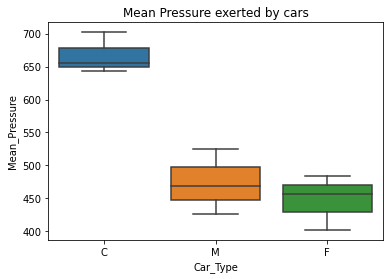

In [5]:
sns.boxplot(x='Car_Type',y='Mean_Pressure',data=mean_pressure_df)
plt.title('Mean Pressure exerted by cars')
plt.show()

### Step 1: State the null and alternative hypothesis:
* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here μ1, μ2 and μ3 are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses `F-tests` to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
- `statsmodels.formula.api.ols` creates a model from a formula and dataframe
- `statsmodels.api.sm.stats.anova_lm` gives an Anova table for one or more fitted linear models

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary least squares

In [7]:
# ols maps Mean_Pressure to Car_Type and is there any difference in the mean due to car type

# as per ANOVA table
# total sum of variability in the data can be decomposed into two:
# due to sum of variance due to car type - variation BETWEEN cars
# and due to residual - variation WITHIN the car

#df - degree of freedom for:
# car type is n-1 => 3-1=2
# for residual n-1 => 9-1=8=6+2

# F-statistic :
# ratio between normalised sum squares i.e;(sum_sq/df)
# thus variance between cars/variance within cars =25

#PR: gives the p_value

In [8]:
mod = ols(formula='Mean_Pressure ~ Car_Type',data=mean_pressure_df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Car_Type,86049.555556,2.0,25.175411,0.001207
Residual,10254.000000,6.0,NaN,NaN


### Step 5: Decide to reject or accept null hypothesis
In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is sufficient evidence to reject the null hypothesis that at least one mean pressure of car is different from others .

### Determine which mean(s) is / are different
- An ANOVA test will test that at least one mean is different.
- We have rejected the null hypothesis but do not know which mean(s) is / are different.
- We use `Tukey-krammer HSD` test to detect which mean(s) is / are different.

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['Car_Type']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C      F -219.3333 0.0015 -322.7791 -115.8876   True
     C      M    -193.0  0.003 -296.4458  -89.5542   True
     F      M   26.3333 0.7172  -77.1124  129.7791  False
---------------------------------------------------------


#### Inference
- Compact Car Vs Full-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Full-size cars.

- Compact Car Vs Mid-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Mid-size cars.

- Full-size Car Vs Mid-size cars: Since the result - reject is false, mean head pressure is statistically equal to Full-size and Mid-size cars.

## Two-way ANOVA
### Example
The table below shows the percentage of customers satisfied with the quality of service (QoS) offered by A1 Electronics Corporation Limited.

Conduct a two-way ANOVA and draw your inferences about the population means of QoS corresponding to the days as well as the stores.

In [10]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,79, 81, 74, 77, 66],\
           [2, 78, 86, 89, 97, 86], [3, 81, 87, 84, 94, 82], [4, 80, 83, 81, 88, 83], [5, 70, 74, 77, 89, 68]]

headers = table1.pop(0)

df1 = pd.DataFrame(table1,columns=headers)
df1

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,79,81,74,77,66
1,2,78,86,89,97,86
2,3,81,87,84,94,82
3,4,80,83,81,88,83
4,5,70,74,77,89,68


### Step 1: State the null and alternative hypothesis:
The `null hypotheses` for each of the sets are given below.

- The population means of the first factor (Day) are equal.
- The population means of the second factor (Store) are equal.

`Alternative Hypothesis`:

- The population means of the first factor (Day) are not equal.
- The population means of the second factor (Store) are not equal.

### Step 2: Decide the significance level
Here we select `α = 0.05`

### Step 3: Identify the test statistic
Here we have five groups and five factors. There are two independent variables, Day and Store.
Two-way ANOVA determines how a response (Quality of Servoce) is affected by two factors, Day and Store.
Here we use 2-way ANOVA without replication since each cell has only one observation.

### Step 4: Calculate p value using ANOVA table
`statsmodels.formula.api.ols` creates a model from a formula and dataframe
`statsmodels.api.sm.stats.anova_lm` gives an Anova table for one or more fitted linear models

In [11]:
d0_val  = df1['Day'].values
d1_val  = df1['Store-A'].values
d2_val  = df1['Store-B'].values
d3_val  = df1['Store-C'].values
d4_val  = df1['Store-D'].values
d5_val  = df1['Store-E'].values

In [12]:
df1     = pd.DataFrame({'Day': d0_val, 'Store':'A', 'QoS': d1_val})
df2     = pd.DataFrame({'Day': d0_val, 'Store':'B', 'QoS': d2_val})
df3     = pd.DataFrame({'Day': d0_val, 'Store':'C', 'QoS': d3_val})
df4     = pd.DataFrame({'Day': d0_val, 'Store':'D', 'QoS': d4_val})
df5     = pd.DataFrame({'Day': d0_val, 'Store':'E', 'QoS': d5_val})

QoS_df  = pd.DataFrame()

QoS_df  = QoS_df.append(df1) 
QoS_df  = QoS_df.append(df2) 
QoS_df  = QoS_df.append(df3) 
QoS_df  = QoS_df.append(df4) 
QoS_df  = QoS_df.append(df5) 


QoS_df

,Day,Store,QoS
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70
0,1,B,81
1,2,B,86
2,3,B,87
3,4,B,83
4,5,B,74


### Formulate ANOVA table

In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [14]:
model = ols(formula='QoS ~ C(Day) + C(Store)',data=QoS_df).fit() # C -> categorical
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Day),617.36,4.0,8.737051,0.000614
C(Store),461.76,4.0,6.534956,0.002575
Residual,282.64,16.0,NaN,NaN


### Step 5: Decide to reject or accept null hypothesis
In this example,

- p value for Day is 0.000614 and < 0.05 so we reject the null hypothesis (1) and conclude that the Day is having an effect on Quality of Service.
- p value for Stores is 0.002575 and < 0.05 so we reject the null hypothesis (2) and conclude that the Stores is having an effect on Quality of Service.

### We conclude that stores as well as days reveal different patterns in the level of QoS.

# Chi Square

A chi-square distribution with k degrees of freedom is given by sum of squares of standard normal random variables $Z_1$, $Z_2$, ... $Z_k$ obtained by transforming normal standard variables $X_1$, $X_2$, ... $X_k$ with mean values $\mu_1$, $\mu_2$, ... $\mu_k$ and corresponding standard deviation $\sigma_1$, $\sigma_2$, ... $\sigma_k$

${\chi_k}^2$ = ${Z_1}^2$ + ${Z_2}^2$ + … + ${Z_k}^2$ 


The probability density function of f(x) = 

$\frac{x^{\frac{k}{2}-1}e^\frac{-x}{2}}{2^{\frac{k}{2}} \Gamma {\bigg(\frac{k}{2}\bigg)}}$ if x > 0 else 0

where Γ(k/2) is a gamma function given by     
$\Gamma\frac{k}{2}$ = ${\int_0}^\infty x^{k-1} e^{-x} dx$

### Properties of Chi Square distribution

##### 1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
##### 2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 4. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution of data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


Chi-square statistic for goodness of fit is given by    
$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

### This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

###  Example

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:
Null hypothesis: $H_0$: Meal preference is as per the perceived ratios of the operations manager
                        
Alternative hypothesis: $H_A$: Meal preference is different from the perceived ratios of the operations manager

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Since we have observed frequencies of meal preference and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

### Step 4: Calculate p value or chi-square statistic value
Use the `scipy.stats.chisquare` function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:

- Compute the total number of passengers. It will be 500.
- We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
- Similarly we can calculate the expected frequencies of the rest of them.

In [15]:
import scipy

observed_values = np.array([190, 185, 90, 35])

n = observed_values.sum() # 500

expected_values = np.array([n*0.3, n*.45, n*0.2, n*0.05])  # corresponding to each we calculate expected percentage

chi_square, p_value = scipy.stats.chisquare(f_obs=observed_values,f_exp=expected_values)

In [16]:
chi_square

22.77777777777778

In [17]:
p_value

4.492718590376291e-05

### Step 5: Decide to reject or accept null hypothesis
#### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
#### So, we conclude that Meal preference is not defined in the null hypothesis.

## Chi-square tests of independence
Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

`scipy.stats.chi2_contingency` is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### Example

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:
Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
We use the chi-square test of independence to find out the difference of categorical variables

### Step 4: Calculate p value or chi-square statistic value

In [18]:
quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = scipy.stats.chi2_contingency(quality_array)

In [19]:
chi_sq_Stat

22.152468645918482

In [20]:
p_value

1.547578021398957e-05

In [21]:
deg_freedom # R-1 * C-1

2

In [22]:
exp_freq

array([[115.14,  85.5 ,  84.36],
       [ 86.86,  64.5 ,  63.64]])

### Step 5: Decide to reject or accept null hypothesis
#### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis.
#### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.¶